<!DOCTYPE html>
<html>
<head>
  <style>
    body {
      font-family: Arial, sans-serif;
      margin: 20px;
      color: #008000; /* Green color */
    }
    h2 {
      color: inherit; /* Inherit color from the body */
    }
  </style>
</head>
<body>
  <h2>In this notebook we will learn about:</h2>
  <ol>
    <li>Handling missing values</li>
    <li>Imbalance dataset issue</li>
    <li>Outliers</li>
    <li>Converting / Encoding data (categorical to numerical)</li>
    <li>Duplicate data</li>
    <li>Splitting dataset</li>
    <li>Scaling data</li>
    <li>Feature Engineering</li>
  </ol>
</body>
</html>

**Mount Google Drive from Colab**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Mount Dataset from Google Drive**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Fresh Notes/Datasets/iris.csv')
df.head()  #first 5 rows of the dataset

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.head(10)  #first 10 rows of the dataset

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,NaN,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [ ]:
df.tail()  #last 5 rows of the dataset

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


In [ ]:
df.tail(10)  #last 10 rows of the dataset

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
140,141,6.7,3.1,5.6,2.4,virginica
141,142,6.9,3.1,5.1,2.3,virginica
142,143,5.8,2.7,5.1,1.9,virginica
143,144,6.8,3.2,5.9,2.3,virginica
144,145,6.7,3.3,5.7,2.5,virginica
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


In [ ]:
df[60:65]  #selecting specific number of rows and 60-64 rows value. Excluding 65th number value.

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
60,61,5.0,2.0,3.5,1.0,versicolor
61,62,5.9,3.0,4.2,1.5,versicolor
62,63,6.0,2.2,4.0,1.0,versicolor
63,64,6.1,2.9,4.7,1.4,versicolor
64,65,5.6,2.9,3.6,1.3,versicolor


In [ ]:
df['Petal.Length']  #only the Petal.Length column

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: Petal.Length, Length: 150, dtype: float64

In [ ]:
df['Petal.Length'].head()  #first 5 sample of the Petal.Length column

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: Petal.Length, dtype: float64

***Loc*** and **iLoc**
Note: loc() function is label indexing which means that we have to pass the name of the row or column which we want to select, while iloc() is used for integer indexing.

In [ ]:
df.loc[(df['Species'] == 'virginica')]  #All virginica (from species) information

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,101,6.3,3.3,6.0,2.5,virginica
101,102,5.8,2.7,5.1,1.9,virginica
102,103,7.1,3.0,5.9,2.1,virginica
103,104,6.3,2.9,5.6,1.8,virginica
104,105,6.5,3.0,5.8,2.2,virginica
105,106,7.6,3.0,6.6,2.1,virginica
106,107,4.9,2.5,4.5,1.7,virginica
107,108,7.3,2.9,6.3,1.8,virginica
108,109,6.7,2.5,5.8,1.8,virginica
109,110,7.2,3.6,6.1,2.5,virginica


In [ ]:
#All virginica (from species) which has Sepal.Length and which bigger than 6 information
df.loc[(df['Species'] == 'virginica') & (df['Sepal.Length'] > 6)]

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,101,6.3,3.3,6.0,2.5,virginica
102,103,7.1,3.0,5.9,2.1,virginica
103,104,6.3,2.9,5.6,1.8,virginica
104,105,6.5,3.0,5.8,2.2,virginica
105,106,7.6,3.0,6.6,2.1,virginica
107,108,7.3,2.9,6.3,1.8,virginica
108,109,6.7,2.5,5.8,1.8,virginica
109,110,7.2,3.6,6.1,2.5,virginica
110,111,6.5,3.2,5.1,2.0,virginica
111,112,6.4,2.7,5.3,1.9,virginica


In [ ]:
df.iloc[[0,56]]  #print only index 0,56. Note: iLoc pass the index value.

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
56,57,6.3,3.3,4.7,1.6,versicolor


In [ ]:
df.iloc[[53, 54, 55, 56]]  #print only 53, 54, 55, 56th index.

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
53,54,5.5,2.3,4.0,1.3,versicolor
54,55,6.5,2.8,4.6,1.5,versicolor
55,56,5.7,2.8,4.5,1.3,versicolor
56,57,6.3,3.3,4.7,1.6,versicolor


In [ ]:
df.iloc[53:57]  #another method of print only 53, 54, 55, 56th index. (first index include, last index exclude)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
53,54,5.5,2.3,4.0,1.3,versicolor
54,55,6.5,2.8,4.6,1.5,versicolor
55,56,5.7,2.8,4.5,1.3,versicolor
56,57,6.3,3.3,4.7,1.6,versicolor


In [ ]:
df['Species'].iloc[10:16]  #print only species column 10 to 15th value

10    setosa
11    setosa
12    setosa
13    setosa
14    setosa
15    setosa
Name: Species, dtype: object

In [ ]:
df.columns  #print all columns to see

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [ ]:
len(df)  #total samples/rows of the dataset

150

# Handling missing values

In [ ]:
df.isnull()  #Check for missing values, if true returns, then missing value exists & if false returns, there is no missing values.

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
df.isnull().sum()  #Check for missing values #Column based #Here, Sepal.Length has 2 missing values and more.

Unnamed: 0      0
Sepal.Length    2
Sepal.Width     1
Petal.Length    1
Petal.Width     1
Species         0
dtype: int64

In [ ]:
df.info()  #dataset information with null count and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  148 non-null    float64
 2   Sepal.Width   149 non-null    float64
 3   Petal.Length  149 non-null    float64
 4   Petal.Width   149 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()
#generate descriptive statistics of a Dataset and only work for numerical values count.
#number of non-null values, mean, standard deviation, minimum, 25th percentile(Q1), median(50th percentile or Q2), 75th percentile(Q3), and maximum.

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,148.000000,149.000000,149.000000,149.000000
mean,75.500000,5.854054,3.056376,3.773154,1.198658
std,43.445368,0.828438,0.437178,1.761435,0.764763
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.400000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#copying the array into another array, for experiment.df1 = df.copy()
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()

**How to handle missing values in Dataset**

Method 01: Dropping / deleting the entire row / column that has missing value

In [ ]:
#dropping/deleting the entire row that has missing value
df1.dropna (subset=['Sepal.Width'], inplace=True)
df1.dropna (subset=['Petal.Length'], inplace=True)
df1.dropna (subset=['Petal.Width'], inplace=True)

In [ ]:
len(df1)  #after deleting, the number of rows (145) remained.

147

In [ ]:
#dropping/deleting the entire row that has missing value, by using the axis parameter of the dropna() method.
df2.dropna(axis=1)

,Unnamed: 0,Species
0,1,setosa
1,2,setosa
2,3,setosa
3,4,setosa
4,5,setosa
...,...,...
145,146,virginica
146,147,virginica
147,148,virginica
148,149,virginica


In [ ]:
df2.shape[1]  #get the number of columns after dropping

6

Method 02: To fill missing values in a DataFrame, we can use the fillna method. Now put some value in the null place. For numeric null value, it can be the mean/median/mode of the column and for
the categorical value, it can be the most frequent value of the column.

In [ ]:
df3['Sepal.Length'] = df3['Sepal.Length'].fillna(df3['Sepal.Length'].mean())  # replace by mean
df3['Sepal.Width'] = df3['Sepal.Width'].fillna(df3['Sepal.Width'].median()) # replace by median

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  149 non-null    float64
 4   Petal.Width   149 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
most_frequent_category = df3['Species'].mode().iloc[0]  # Find the most frequent category
df3['Species'].fillna (most_frequent_category, inplace=True) # replacing with most frequent means most counted value insert

In [ ]:
df3 = df3.apply(lambda x:x.fillna(x.value_counts() .index [0]))
#replacing null value with most frequent value

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#Handling categorical values or encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder ()

In [ ]:
df['Sepal.Length'] = le.fit_transform(df['Sepal.Length'])
df['Sepal.Width'] = le.fit_transform(df['Sepal.Width'])
df['Petal.Length'] = le.fit_transform(df['Petal.Length'])
df['Petal.Width'] = le.fit_transform(df['Petal.Width'])
df['Species'] = le.fit_transform(df['Species'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    150 non-null    int64
 1   Sepal.Length  150 non-null    int64
 2   Sepal.Width   150 non-null    int64
 3   Petal.Length  150 non-null    int64
 4   Petal.Width   150 non-null    int64
 5   Species       150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


**One hot encoding**

In [ ]:
one_hot_encoded_data = pd.get_dummies (df, columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species' ])

In [ ]:
one_hot_encoded_data

,Unnamed: 0,Sepal.Length_0,Sepal.Length_1,Sepal.Length_2,Sepal.Length_3,Sepal.Length_4,Sepal.Length_5,Sepal.Length_6,Sepal.Length_7,Sepal.Length_8,...,Petal.Width_16,Petal.Width_17,Petal.Width_18,Petal.Width_19,Petal.Width_20,Petal.Width_21,Petal.Width_22,Species_0,Species_1,Species_2
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
146,147,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
147,148,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
148,149,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 131 entries, Unnamed: 0 to Species_2
dtypes: int64(1), uint8(130)
memory usage: 20.3 KB


#Imbalance dataset issue

In [ ]:
df['Sepal.Length'].unique() #what unique values

array([ 8,  6,  4,  3,  7, 11, 35,  1,  5,  0, 15, 14,  9, 12,  2, 10, 27,
       21, 26, 22, 20, 23, 16, 17, 18, 13, 24, 19, 25, 28, 32, 30, 29, 33,
       31, 34])

In [ ]:
df['Sepal.Length'].nunique() #how many unique values?

36

In [ ]:
value_counts = df.groupby('Sepal.Length').size().reset_index(name='Count')  #find unique value shortcut
print(value_counts)

    Sepal.Length  Count
0              0      1
1              1      3
2              2      1
3              3      4
4              4      2
5              5      5
6              6      6
7              7      9
8              8      8
9              9      4
10            10      1
11            11      6
12            12      7
13            13      6
14            14      8
15            15      7
16            16      3
17            17      6
18            18      6
19            19      4
20            20      9
21            21      7
22            22      5
23            23      2
24            24      8
25            25      3
26            26      4
27            27      1
28            28      1
29            29      3
30            30      1
31            31      1
32            32      1
33            33      4
34            34      1
35            35      2


**Undersampling means reducing the major class samples to match minor class samples**

In [ ]:
from sklearn.utils import resample
majority_length = df[df['Sepal.Length'] == 1]
minority_length = df[df['Sepal.Length'] == 0]
n_samples = len (minority_length)
majority_downsampled = resample(majority_length, replace=False, n_samples=n_samples, random_state=42)
balanced_df = pd.concat([minority_length, majority_downsampled])

In [ ]:
value_counts = balanced_df.groupby('Sepal.Length').size().reset_index(name='Count')  #find unique value shortcut
print (value_counts)

   Sepal.Length  Count
0             0      1
1             1      1


#Oversampling (SMOTE): increasing the sample of minor class

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop('Sepal.Length', axis=1)
y = df['Sepal.Length']
smote= SMOTE (random_state=42) # You can set different parameters if needed
#X_resampled, y_resampled = smote.fit_resample (X, y)
#oversampled_df = pd.DataFrame (X_resampled, columns=X.columns)
#oversampled_df['Sepal.Length'] =y_resampled

In [ ]:
#value_counts = oversampled_df.groupby('Sepal.Length').size().reset_index(name="Count")
print(value_counts)  #find unique value shortcut

   Sepal.Length  Count
0             0      1
1             1      1


#Outlier finding and removing

**A finding from figure**

In [ ]:
import matplotlib.pyplot as plt  # plt.plot(x, y)
import seaborn as sns  # sns.histplot(data=df, x='column_name')

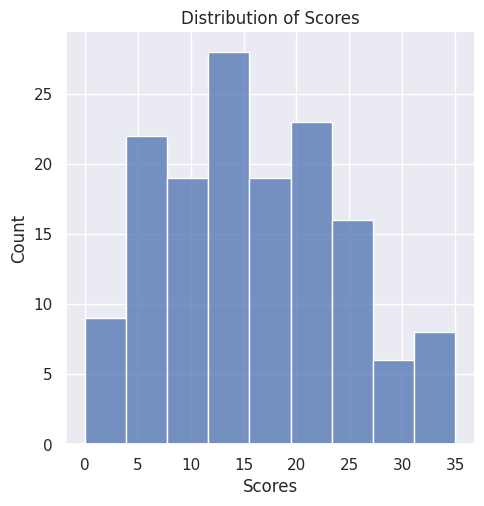

In [ ]:
sns.set_theme(color_codes= "red")  # Set seaborn theme
sns.displot(data=df['Sepal.Length']).set(title="Distribution of Scores", xlabel="Scores")  #code for creating the displot

**Statistical approach**

In [ ]:
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,15.753333,9.653333,18.446667,9.080000,1.000000
std,43.445368,8.428090,4.458589,11.780166,6.484385,0.819232
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.250000,8.000000,7.000000,6.000000,2.000000,0.000000
50%,75.500000,15.000000,9.000000,20.000000,9.000000,1.000000
75%,112.750000,21.000000,12.750000,27.000000,14.000000,2.000000
max,150.000000,35.000000,23.000000,43.000000,22.000000,2.000000


**By finding Z-score approach [-3 to 3]**

In [ ]:
z_score=(df['Sepal.Length'] - df['Sepal.Length'].mean())/df['Sepal.Length'].std()

In [ ]:
for i in z_score:
  if i<-3:
    print ("yout have outlier", i)  #check if z-score is less than -3 (indicating an outlier)
  elif i>3:
    print("you have outlier ",i)  #check if z-score is greater than 3 (indicating an outlier)
  else:           #No outlier, continue to the next iteration
    continue

In [ ]:
target_value = 20.289079482050578

# Check if the target value is in the z_score Series
if target_value in z_score.values:
    index = z_score[z_score == target_value].index[0]    #get the index of the target value
    print(f"The index of {target_value} is {index}")
else:
    print(f"{target_value} not found in the z_score Series")

#index = z_score.index[z_score == 20.289079482050578][0]

20.289079482050578 not found in the z_score Series


In [ ]:
index = None  #find the index where the outlier is

None


In [ ]:
df['Sepal.Length'][4]  #find the exact value of the index

7

In [ ]:
df['Sepal.Length'][4] = df['Sepal.Length'].mean()
# now we will replace the outlier by the mean value of "Sepal.Length"

In [ ]:
df ['Sepal.Length'][4]  #check if the value is updated by the mean or not

15.753333333333334

#Handling Duplicate Samples

In [ ]:
# find the duplicates
duplicates = df[df.duplicated(keep='first')]
duplicates

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species


In [ ]:
# drop duplicates
df_no_duplicates = df.drop_duplicates()

In [ ]:
#recheck if ther is any duplicate remaining
duplicates = df_no_duplicates[df_no_duplicates.duplicated(keep='first')]
duplicates


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species


#Feature Engineering

<ipython-input-235-a69486a316cc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat_plot = sns.heatmap(df_no_duplicates.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})


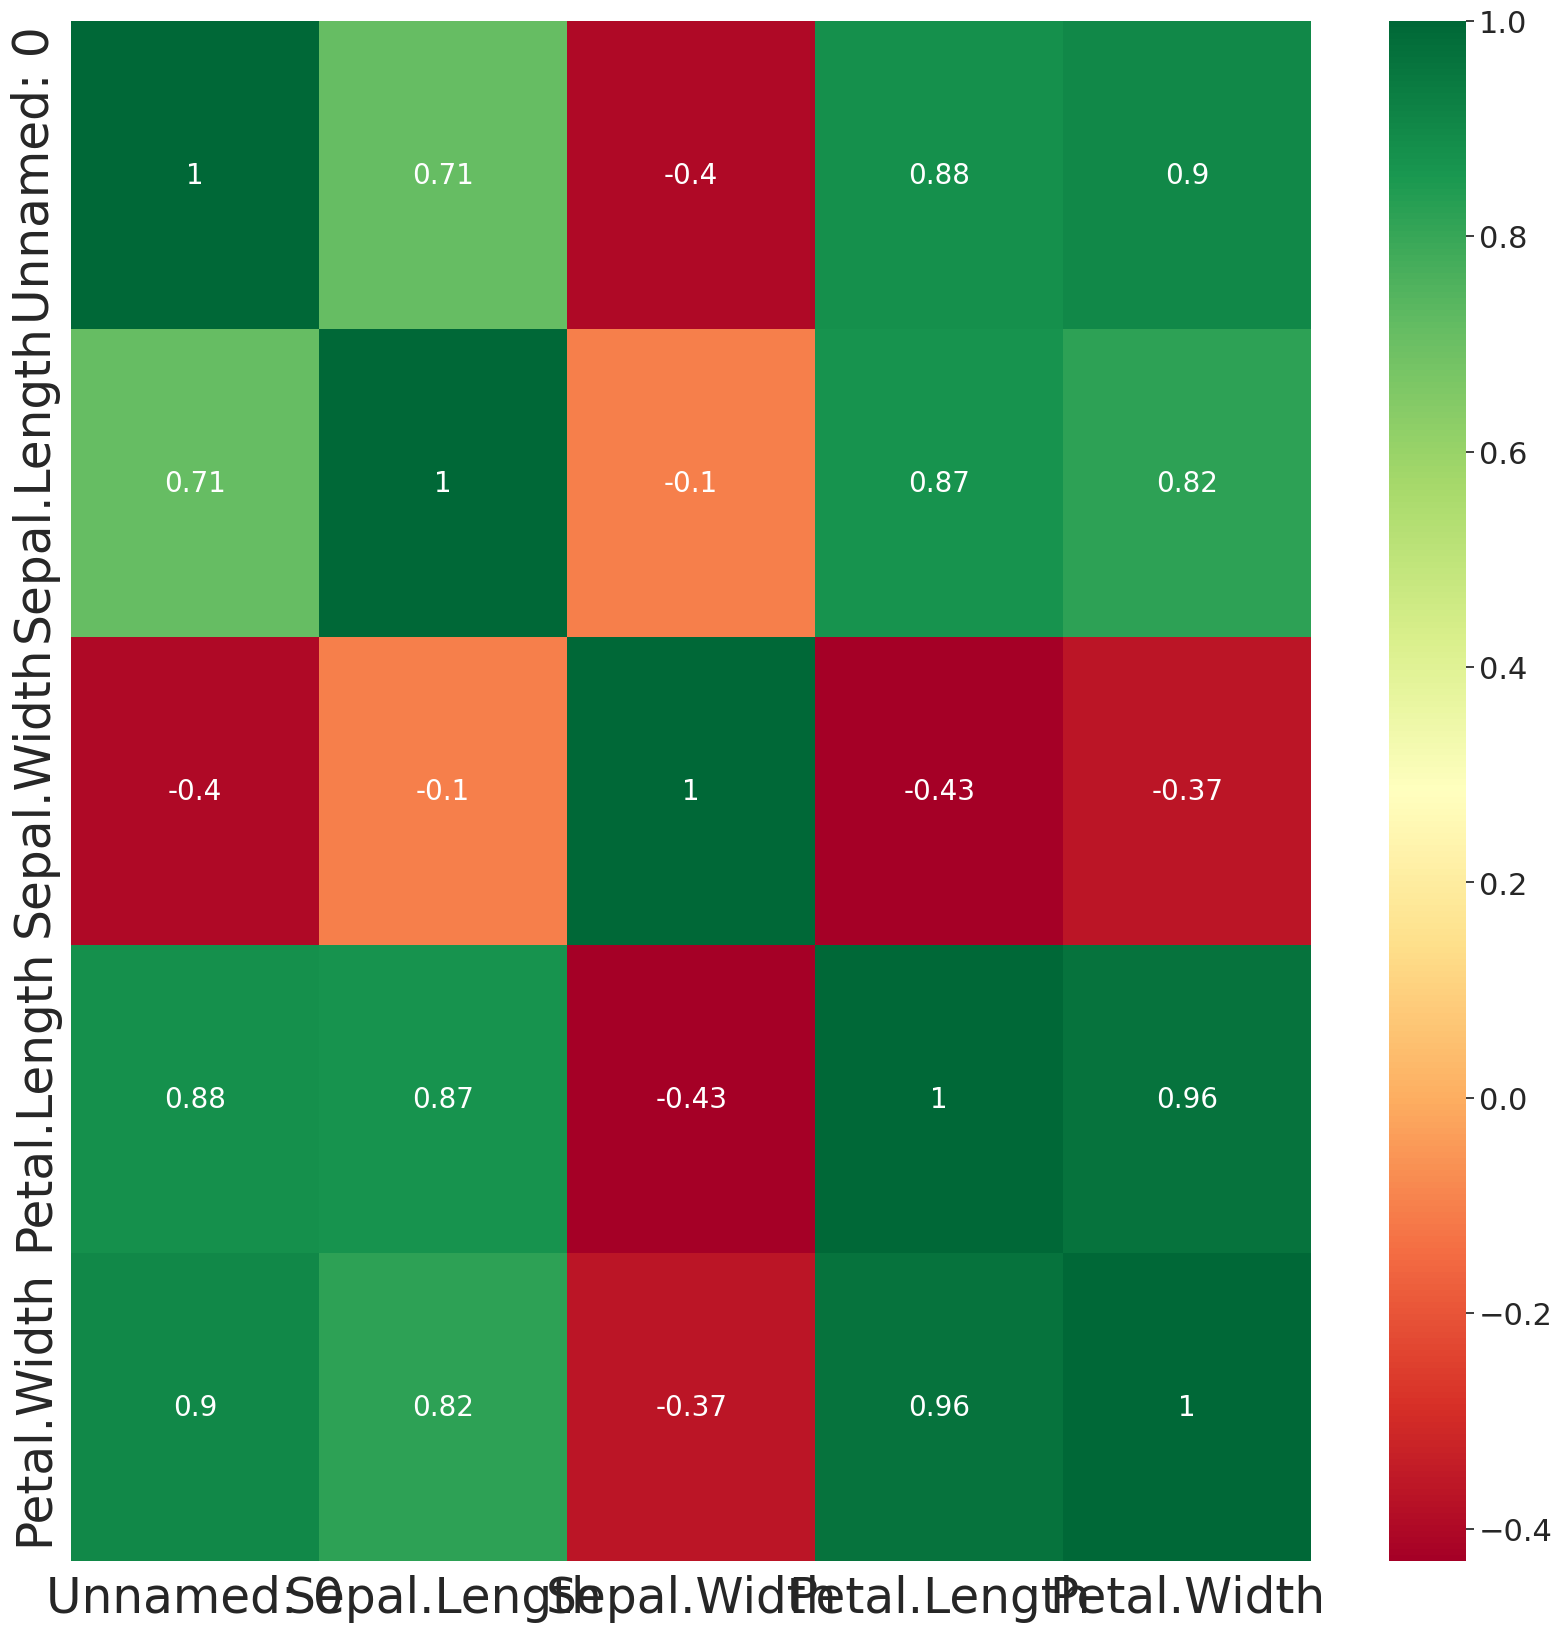

In [ ]:
# pearson correlation / heatmap
sns.set(font_scale=2)
plt.subplots(figsize=(20, 20))
heat_plot = sns.heatmap(df_no_duplicates.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})
plt.yticks(fontsize=35)  # Corrected the typo here
plt.xticks(fontsize=35)
plt.show()

In [ ]:
# finding exact correlation values by descending order
correlations = df_no_duplicates.corr(method="pearson")
print(correlations['Sepal.Length'].sort_values(ascending=False).to_string())

Sepal.Length    1.000000
Petal.Length    0.869051
Petal.Width     0.816996
Unnamed: 0      0.712413
Sepal.Width    -0.104543


<ipython-input-234-2328f8dc75b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_no_duplicates.corr(method="pearson")


#Separating feature and target

In [ ]:
df_no_duplicates

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Sometimes need to shuffle entire dataset to ensure diversity
from sklearn.utils import shuffle
shuffeled_df = shuffle(df_no_duplicates)

In [ ]:
shuffeled_df
#see shuffled data, look at the 'Sepal.Length	' column

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
105,106,7.6,3.0,6.6,2.1,virginica
124,125,6.7,3.3,5.7,2.1,virginica
55,56,5.7,2.8,4.5,1.3,versicolor
10,11,5.4,3.7,1.5,0.2,setosa
142,143,5.8,2.7,5.1,1.9,virginica
...,...,...,...,...,...,...
35,36,5.0,3.2,1.2,0.2,setosa
26,27,5.0,3.4,1.6,0.4,setosa
132,133,6.4,2.8,5.6,2.2,virginica
7,8,NaN,3.4,1.5,0.2,setosa


In [ ]:
rearranged_df=shuffeled_df.reset_index(drop=True)
#re-arranging the index values

In [ ]:
rearranged_df
# see the index values

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,106,7.6,3.0,6.6,2.1,virginica
1,125,6.7,3.3,5.7,2.1,virginica
2,56,5.7,2.8,4.5,1.3,versicolor
3,11,5.4,3.7,1.5,0.2,setosa
4,143,5.8,2.7,5.1,1.9,virginica
...,...,...,...,...,...,...
145,36,5.0,3.2,1.2,0.2,setosa
146,27,5.0,3.4,1.6,0.4,setosa
147,133,6.4,2.8,5.6,2.2,virginica
148,8,NaN,3.4,1.5,0.2,setosa


In [ ]:
X= rearranged_df.drop(columns=['Sepal.Length'])
#X is all features. So remove target to get x

In [ ]:
X

,Unnamed: 0,Sepal.Width,Petal.Length,Petal.Width,Species
0,106,3.0,6.6,2.1,virginica
1,125,3.3,5.7,2.1,virginica
2,56,2.8,4.5,1.3,versicolor
3,11,3.7,1.5,0.2,setosa
4,143,2.7,5.1,1.9,virginica
...,...,...,...,...,...
145,36,3.2,1.2,0.2,setosa
146,27,3.4,1.6,0.4,setosa
147,133,2.8,5.6,2.2,virginica
148,8,3.4,1.5,0.2,setosa


In [ ]:
y= rearranged_df[ 'Sepal.Length']
#y is target. it contains only the value of 'Sepal.Length' column

In [ ]:
y

0      7.6
1      6.7
2      5.7
3      5.4
4      5.8
      ... 
145    5.0
146    5.0
147    6.4
148    NaN
149    4.8
Name: Sepal.Length, Length: 150, dtype: float64

#Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Fit and transform the data

In [ ]:
# Assuming 'X' is the DataFrame. Select only numeric columns
numeric_columns = X.select_dtypes(include='number').columns

# Create a DataFrame containing only numeric columns
X_numeric = X[numeric_columns]

# Create an instance of MinMaxScaler
scaler1 = MinMaxScaler()

# Fit and transform the numeric data
MinMax_scaled_df = scaler1.fit_transform(X_numeric)

# Print the scaled data
print(MinMax_scaled_df)

[[0.70469799 0.41666667 0.94915254 0.83333333]
 [0.83221477 0.54166667 0.79661017 0.83333333]
 [0.36912752 0.33333333 0.59322034 0.5       ]
 [0.06711409 0.70833333 0.08474576 0.04166667]
 [0.95302013 0.29166667 0.69491525 0.75      ]
 [0.4966443  0.375      0.55932203 0.5       ]
 [0.80536913 0.5        0.79661017 0.91666667]
 [0.26174497 0.58333333 0.08474576 0.04166667]
 [0.47651007 0.33333333 0.50847458 0.5       ]
 [0.16778523 0.41666667 0.10169492 0.04166667]
 [0.8590604  0.33333333 0.77966102 0.83333333]
 [0.33557047 0.5        0.62711864 0.54166667]
 [0.09395973 0.83333333 0.03389831 0.04166667]
 [0.73825503 0.5        0.69491525 0.79166667]
 [0.79865772 0.08333333 0.6779661  0.58333333]
 [0.20134228 0.45833333 0.10169492 0.04166667]
 [0.82550336 0.29166667 0.66101695 0.70833333]
 [0.56375839 0.41666667 0.59322034 0.58333333]
 [0.60402685 0.25       0.57627119 0.45833333]
 [0.91275168 0.58333333 0.77966102 0.95833333]
 [0.32885906 0.54166667 0.06779661 0.04166667]
 [0.30201342 

In [ ]:
# Assuming 'X' is the DataFrame. Select only numeric columns
numeric_columns = X.select_dtypes(include='number').columns

# Create a DataFrame containing only numeric columns
X_numeric = X[numeric_columns]

# Create an instance of StandardScaler
scaler2 = StandardScaler()

# Fit and transform the numeric data
STD_scaled_df = scaler2.fit_transform(X_numeric)

# Print the scaled data
print(STD_scaled_df)

[[ 7.04382982e-01 -1.29388889e-01  1.61026658e+00  1.18256475e+00]
 [ 1.14317894e+00  5.59144841e-01  1.09759624e+00  1.18256475e+00]
 [-4.50343218e-01 -5.88411375e-01  4.14035780e-01  1.32961487e-01]
 [-1.48959680e+00  1.47718981e+00 -1.29486536e+00 -1.31024300e+00]
 [ 1.55888037e+00 -8.17922618e-01  7.55816009e-01  9.20163931e-01]
 [-1.15472620e-02 -3.58900132e-01  3.00109037e-01  1.32961487e-01]
 [ 1.05080084e+00  3.29633597e-01  1.09759624e+00  1.44496556e+00]
 [-8.19855601e-01  7.88656084e-01 -1.29486536e+00 -1.31024300e+00]
 [-8.08308339e-02 -5.88411375e-01  1.29218923e-01  1.32961487e-01]
 [-1.14317894e+00 -1.29388889e-01 -1.23790199e+00 -1.31024300e+00]
 [ 1.23555703e+00 -5.88411375e-01  1.04063287e+00  1.18256475e+00]
 [-5.65815838e-01  3.29633597e-01  5.27962523e-01  2.64161894e-01]
 [-1.39721870e+00  2.16572354e+00 -1.46575548e+00 -1.31024300e+00]
 [ 8.19855601e-01  3.29633597e-01  7.55816009e-01  1.05136434e+00]
 [ 1.02770632e+00 -1.96547883e+00  6.98852638e-01  3.95362302e

#Splitting data (train and test dataset)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
#split randomly 20% data for testing and 80% fro training
#X train means the features of training data
# y train meand the target of traning data

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 83 to 61
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    120 non-null    int64  
 1   Sepal.Width   119 non-null    float64
 2   Petal.Length  120 non-null    float64
 3   Petal.Width   120 non-null    float64
 4   Species       120 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 120 entries, 83 to 61
Series name: Sepal.Length
Non-Null Count  Dtype  
--------------  -----  
119 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [ ]:
print ("train data size (features): ", len(x_train))
print ("train data size (target): ", len(y_train))
print ("test data size(feature): ", len(x_test))
print("test data size(target): ", len(y_test))

train data size (features):  120
train data size (target):  120
test data size(feature):  30
test data size(target):  30
